# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

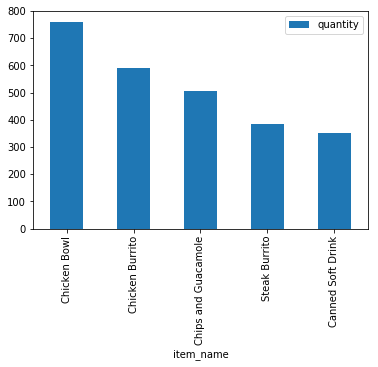

In [4]:
# chipo.groupby(by='item_name').count().sort_values(axis=0, ascending=False)

chipo[['item_name', 'quantity']].groupby(by='item_name').sum().sort_values(by='quantity', ascending=False).head(5).plot(kind='bar')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [5]:
test_var = '$2.39'

test_var.split(sep='$')[1]

test_var.strip

<function str.strip>

In [6]:
chipo.info()
chipo[:5]
# chipo.dtypes

# chipo['item_price'] = lambda x: x.split(sep='$')[1] Woops this applied the lambda function to each element

# Would be better to build the cleaning function that performs the various operations
chipo['item_price'] = chipo.item_price.apply(lambda x: x.split(sep='$')[1])
chipo['item_price'] = chipo.item_price.apply(lambda x: x.strip())

chipo['item_price'] = chipo.item_price.astype('float64')


# They took a slightly alternative route and used a for loop and float method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


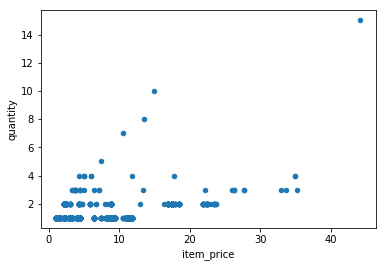

In [7]:
# Works but I need to recast item_price to numeric
chipo[['item_name', 'quantity', 'item_price']].plot(kind='scatter', x='item_price', y='quantity')

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [9]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


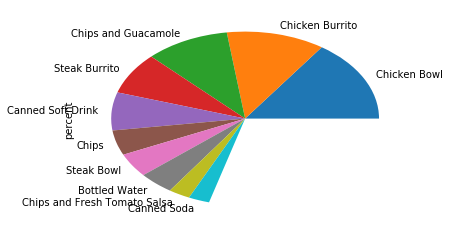

In [36]:
# Pie chart with percent of quantities

# Group things up
chipo_quants = chipo[['quantity', 'item_name']].groupby('item_name').sum().sort_values(by='quantity', ascending=False)
chipo_quants.head()
chipo_quants.sum()

chipo_quants['percent'] = chipo_quants.quantity / chipo_quants.quantity.sum()

chipo_quants.head()
chipo_quants.dtypes

chipo_quants.percent.head(10).plot(kind='pie')

In [37]:
len(chipo_quants)
len(chipo_quants.index)

chipo_quants.index

chipo_quants

,quantity,percent
item_name,,
Chicken Bowl,761,0.153057
Chicken Burrito,591,0.118866
Chips and Guacamole,506,0.101770
Steak Burrito,386,0.077635
Canned Soft Drink,351,0.070595
Chips,230,0.046259
Steak Bowl,221,0.044449
Bottled Water,211,0.042438
Chips and Fresh Tomato Salsa,130,0.026146
